In [2]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 27.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 9.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.0 MB/s eta 0:00:00a 0:00:01


In [3]:
# Importing the necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directories for training and test data
training_dir = 'data/training_set'
test_dir = 'data/test_set'

# Function to load images and labels
def load_images_and_labels(categories, dir):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(dir+"/"+category):
            img = cv2.imread(dir+"/"+category+"/"+image_name)
            if img is not None: # check if image is read correctly
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_array = cv2.resize(img, (128,128)) 
                img_lst.append(img_array)
                labels.append(index)
            else:
                print(f'Image not loaded: {dir}/{category}/{image_name}')
    return img_lst, labels


# Load training and test data
categories = ['dogs', 'cats'] # replace with your actual categories
training_data, training_labels = load_images_and_labels(categories, training_dir)
test_data, test_labels = load_images_and_labels(categories, test_dir)

# Convert lists to numpy arrays
training_data = np.array(training_data)
training_labels = np.array(training_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

Image not loaded: data/training_set/dogs/.DS_Store
Image not loaded: data/training_set/dogs/_DS_Store
Image not loaded: data/training_set/cats/.DS_Store
Image not loaded: data/training_set/cats/_DS_Store
Image not loaded: data/test_set/dogs/.DS_Store
Image not loaded: data/test_set/cats/.DS_Store


In [20]:
# Count the number of cat and dog images in the training directory
train_cats_count = len(os.listdir(os.path.join(training_dir, 'cats')))
train_dogs_count = len(os.listdir(os.path.join(training_dir, 'dogs')))

print(f'Number of cat images in the training set: {train_cats_count}')
print(f'Number of dog images in the training set: {train_dogs_count}')

# Count the number of cat and dog images in the testing directory
test_cats_count = len(os.listdir(os.path.join(test_dir, 'cats')))
test_dogs_count = len(os.listdir(os.path.join(test_dir, 'dogs')))

print(f'Number of cat images in the testing set: {test_cats_count}')
print(f'Number of dog images in the testing set: {test_dogs_count}')


Number of cat images in the training set: 300
Number of dog images in the training set: 300
Number of cat images in the testing set: 4713
Number of dog images in the testing set: 4713


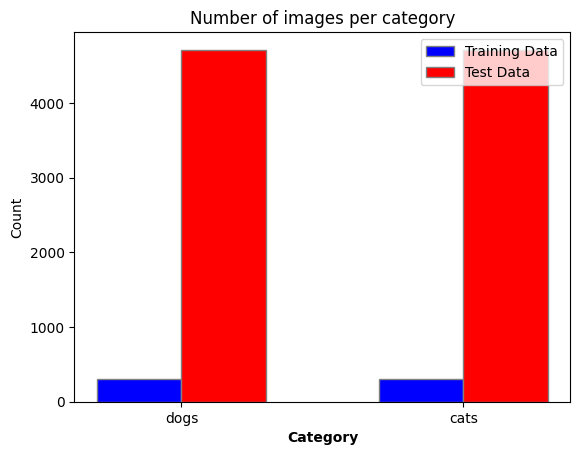

In [24]:
# Get the counts
_, train_counts = np.unique(training_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

# Set the width of a bar in the bar chart
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(train_counts))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, train_counts, color='b', width=barWidth, edgecolor='grey', label='Training Data')
plt.bar(r2, test_counts, color='r', width=barWidth, edgecolor='grey', label='Test Data')

# Adding xticks
plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(train_counts))], categories)
plt.ylabel('Count')
plt.title('Number of images per category')

plt.legend()
plt.show()

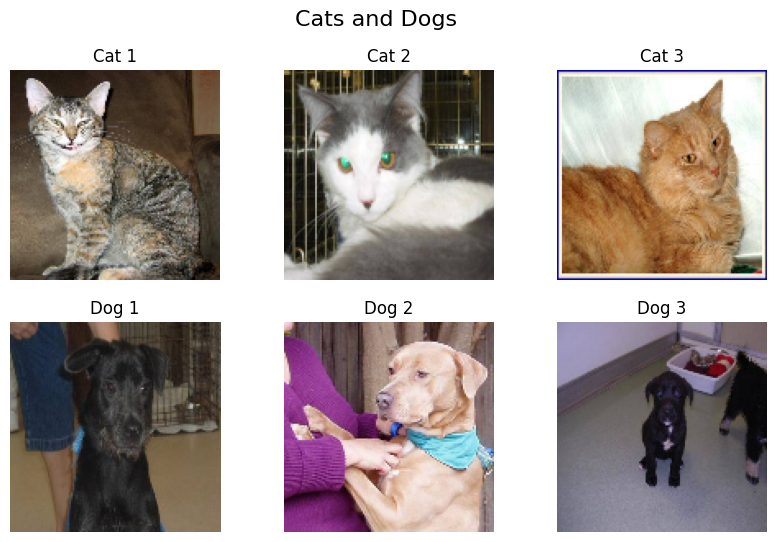

In [25]:
# Select 3 cat images and 3 dog images from the test data
cat_images = test_data[test_labels == 1][:3]
dog_images = test_data[test_labels == 0][:3]

# Create a figure with two rows and three columns
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot the cat images
for i, cat_image in enumerate(cat_images):
    axs[0, i].imshow(cat_image)
    axs[0, i].axis('off')
    axs[0, i].set_title('Cat {}'.format(i+1))

# Plot the dog images
for i, dog_image in enumerate(dog_images):
    axs[1, i].imshow(dog_image)
    axs[1, i].axis('off')
    axs[1, i].set_title('Dog {}'.format(i+1))

# Add a title to the figure
fig.suptitle('Cats and Dogs', fontsize=16)

# Display the plot
plt.show()

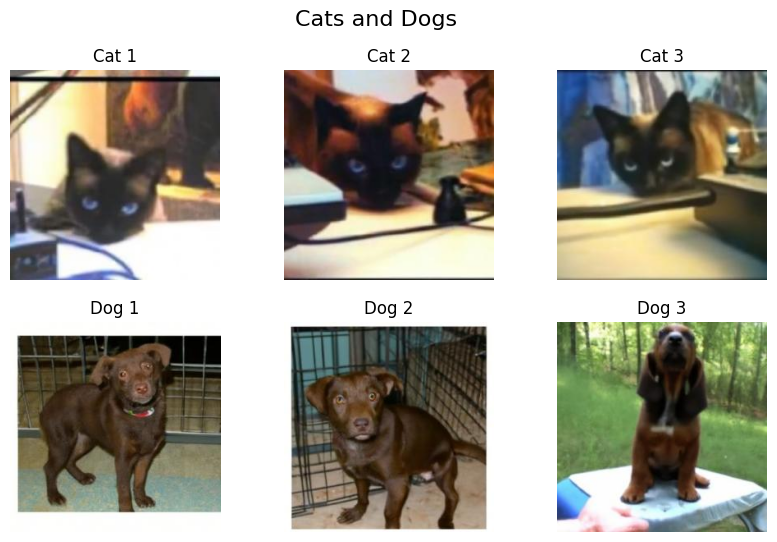

In [30]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

original_cat_path = './data/training_set/cats/cat.5.jpg'
original_dog_path = './data/training_set/dogs/dog.5.jpg'

# Specify the paths to the cat and dog images
cat_paths = ['data/augmented_training_set/cats/augmented_cat.5_0.jpg', 'data/augmented_training_set/cats/augmented_cat.5_1.jpg', 'data/augmented_training_set/cats/augmented_cat.5_2.jpg']
dog_paths = ['data/augmented_training_set/dogs/augmented_dog.1_0.jpg', 'data/augmented_training_set/dogs/augmented_dog.1_1.jpg', 'data/augmented_training_set/dogs/augmented_dog.5_2.jpg']

# Load the cat and dog images using matplotlib's imread function
cat_images = [imread(cat_path) for cat_path in cat_paths]
dog_images = [imread(dog_path) for dog_path in dog_paths]

# Create a figure with two rows and three columns
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot the cat images
for i, cat_image in enumerate(cat_images):
    axs[0, i].imshow(cat_image)
    axs[0, i].axis('off')
    axs[0, i].set_title('Cat {}'.format(i+1))

# Plot the dog images
for i, dog_image in enumerate(dog_images):
    axs[1, i].imshow(dog_image)
    axs[1, i].axis('off')
    axs[1, i].set_title('Dog {}'.format(i+1))

# Add a title to the figure
fig.suptitle('Cats and Dogs', fontsize=16)

# Display the plot
plt.show()

NameError: name 'dalle_cat' is not defined

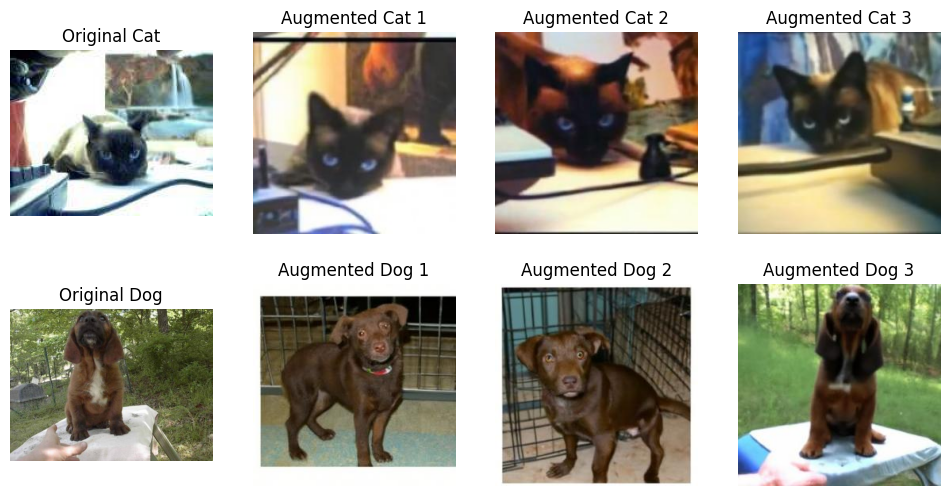

In [32]:
import matplotlib.pyplot as plt
from matplotlib.image import imread


original_cat_path = './data/training_set/cats/cat.5.jpg'
original_dog_path = './data/training_set/dogs/dog.5.jpg'

# Specify the paths to the augmented cat and dog images
dalle_cat_paths = ['data/augmented_training_set/cats/augmented_cat.5_0.jpg', 'data/augmented_training_set/cats/augmented_cat.5_1.jpg', 'data/augmented_training_set/cats/augmented_cat.5_2.jpg']
dalle_dog_paths = ['data/augmented_training_set/dogs/augmented_dog.1_0.jpg', 'data/augmented_training_set/dogs/augmented_dog.1_1.jpg', 'data/augmented_training_set/dogs/augmented_dog.5_2.jpg']

# Load the original cat and dog images using matplotlib's imread function
original_cat = imread(original_cat_path)
original_dog = imread(original_dog_path)

# Load the augmented cat and dog images using matplotlib's imread function
cat_images = [imread(cat_path) for cat_path in dalle_cat_paths]
dog_images = [imread(dog_path) for dog_path in dalle_dog_paths]

# Create a figure with two rows and four columns
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Plot the original cat and dog images
axs[0, 0].imshow(original_cat)
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Cat')

axs[1, 0].imshow(original_dog)
axs[1, 0].axis('off')
axs[1, 0].set_title('Original Dog')

# Plot the augmented cat and dog images
for i, cat_image in enumerate(cat_images):
    axs[0, i+1].imshow(cat_image)
    axs[0, i+1].axis('off')
    axs[0, i+1].set_title('Augmented Cat {}'.format(i+1))

for i, dog_image in enumerate(dog_images):
    axs[1, i+1].imshow(dog_image)
    axs[1, i+1].axis('off')
    axs[1, i+1].set_title('Augmented Dog {}'.format(i+1))

# Plot the DALLE generated cat and dog images
axs[0, 3].imshow(dalle_cat)
axs[0, 3].axis('off')
axs[0, 3].set_title('DALLE Generated Cats')

axs[1, 3].imshow(dalle_dog)
axs[1, 3].axis('off')
axs[1, 3].set_title('DALLE Generated Dogs')

# Add a title to the figure
fig.suptitle('Cats and Dogs', fontsize=16)

# Display the plot
plt.show()
